<a href="https://colab.research.google.com/github/xinpeng13/JSC270_Assg2/blob/shanxinp/JSC270_Assignment2_finished.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Libraries you'll likely need

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import DescrStatsW as dsw

###Importing data

In [ ]:
income94 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
income94.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']
income94

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
income94 = income94.replace(' ?', np.nan)
income94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           30725 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          30718 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      31978 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


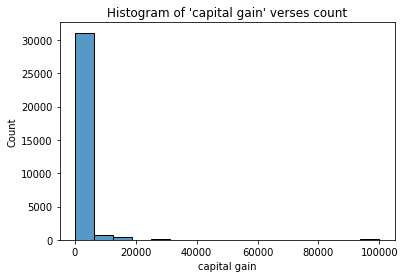

In [ ]:
sns.histplot(x = 'capital_gain', data = income94)
plt.xlabel('capital gain')
plt.title("Histogram of 'capital gain' verses count")
plt.show()

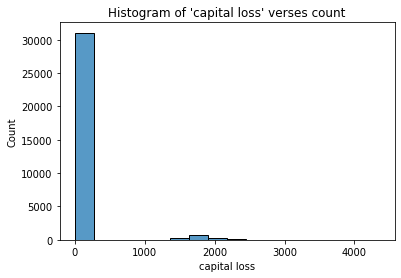

In [ ]:
sns.histplot(x = 'capital_loss', data = income94)
plt.xlabel('capital loss')
plt.title("Histogram of 'capital loss' verses count")
plt.show()

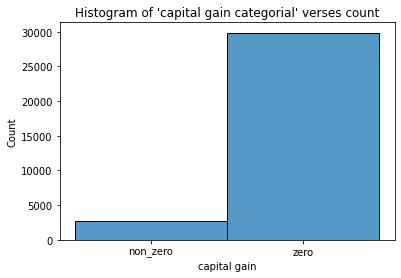

In [ ]:
gain_condition = [(income94['capital_gain']==0), (income94['capital_gain']>0)]
gain_value = ['zero', 'non_zero']
income94['capital_gain_categorical'] = np.select(gain_condition, gain_value)

sns.histplot(x = 'capital_gain_categorical', data = income94)
plt.xlabel('capital gain')
plt.title("Histogram of 'capital gain categorial' verses count")
plt.show()

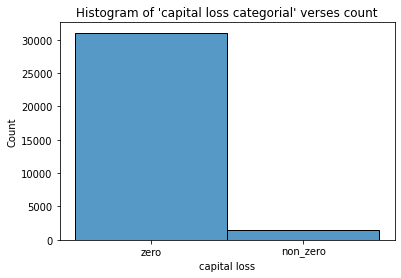

In [ ]:
loss_condition = [(income94['capital_loss']==0), (income94['capital_loss']>0)]
loss_value = ['zero', 'non_zero']
income94['capital_loss_categorical'] = np.select(loss_condition, loss_value)

sns.histplot(x = 'capital_loss_categorical', data = income94)
plt.xlabel('capital loss')
plt.title("Histogram of 'capital loss categorial' verses count")
plt.show()

Initial data exploration Q4

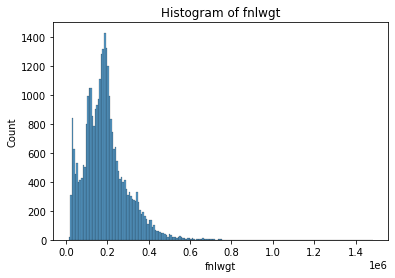

In [ ]:
sns.histplot(x = "fnlwgt", data = income94)
plt.title('Histogram of fnlwgt')
plt.show()

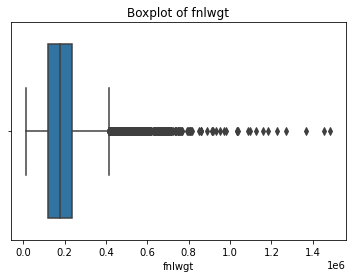

In [ ]:
sns.boxplot(x = "fnlwgt", data = income94)
plt.title('Boxplot of fnlwgt')
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


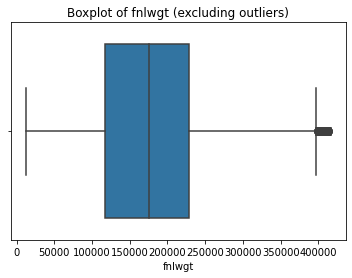

In [ ]:
def get_outliers(variable, df):
  # 1st and 3rd quartiles
  first_q = df[variable].quantile(q=0.25)
  third_q = df[variable].quantile(q=0.75)
  # IQR
  iqr = third_q - first_q
  # Generate lower_fnlwgt and upper_fnlwgt
  lower_fnlwgt = first_q - 1.5*iqr
  upper_fnlwgt = third_q + 1.5*iqr
  # Gen outlier
  outliers = df[(df[variable] > upper_fnlwgt) | (df[variable] < lower_fnlwgt)]
  return outliers

outliers = get_outliers('fnlwgt', income94)
# Replace the outlier values with the median of that variable
income94_fnlwgt = income94.copy()
income94_fnlwgt['fnlwgt'].loc[outliers.index] = np.NaN

sns.boxplot(x = "fnlwgt", data = income94_fnlwgt)
plt.title('Boxplot of fnlwgt (excluding outliers)')
plt.show()

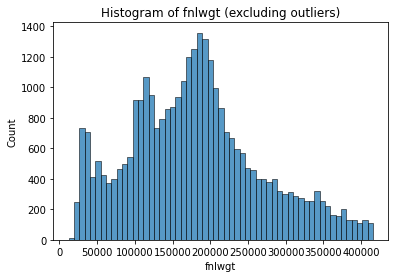

In [ ]:
sns.histplot(x = "fnlwgt", data = income94_fnlwgt)
plt.title('Histogram of fnlwgt (excluding outliers)')
plt.show()

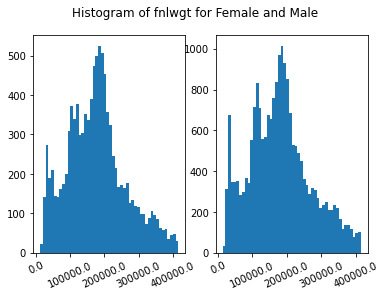

In [ ]:
fig, (plt1, plt2) = plt.subplots(1, 2)
plt.suptitle('Histogram of fnlwgt for Female and Male')
plt1.hist(income94_fnlwgt[income94.sex == ' Female'].fnlwgt, bins = 50)
plt1.set_xticklabels(plt1.get_xticks(), rotation = 25) 
plt2.hist(income94_fnlwgt[income94.sex == ' Male'].fnlwgt, bins = 50)
plt2.set_xticklabels(plt2.get_xticks(), rotation = 25) 
plt.show()

Correlation

In [ ]:
# (a)
list = ['age', 'education_num', 'hours_per_week']
income94[list].corr()

,age,education_num,hours_per_week
age,1.000000,0.036527,0.068756
education_num,0.036527,1.000000,0.148123
hours_per_week,0.068756,0.148123,1.000000


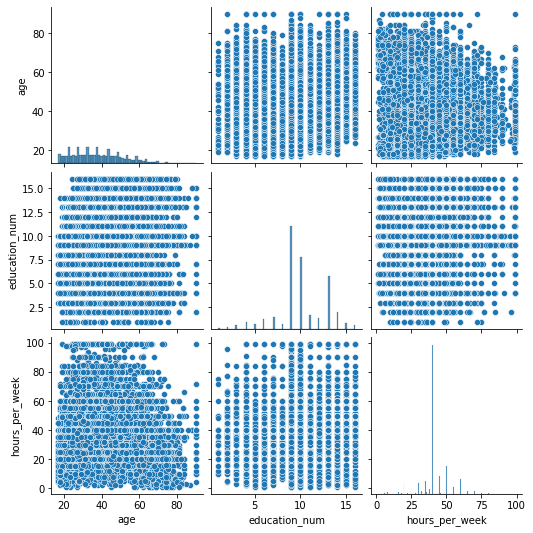

In [ ]:
sns.pairplot(income94[list])
plt.show()

In [ ]:
# (b) paired sampled t-test 
ttest,pvalue = stats.ttest_rel(income94['hours_per_week'], income94['education_num'])
pvalue
if pvalue<0.05:
    print("reject the null hypothesis")
else:
    print("accept the null hypothesis")

reject the null hypothesis


In [ ]:
# (c)
income94[income94.sex==" Female"][['age', 'education_num']].corr()


,age,education_num
age,1.000000,-0.017899
education_num,-0.017899,1.000000


In [ ]:
income94[income94.sex==" Male"][['age', 'education_num']].corr()

,age,education_num
age,1.000000,0.060486
education_num,0.060486,1.000000


In [ ]:
#(d)
covariance = income94[['education_num', 'hours_per_week']].cov()

weighted = np.cov(income94.education_num, income94.hours_per_week, fweights = income94.fnlwgt)

print('Variance/ covariance:\n{}\n\n Weighted variance/ covariance:\n{}'.format(covariance, weighted))

Variance/ covariance:
                education_num  hours_per_week
education_num        6.618890        4.705338
hours_per_week       4.705338      152.458995

 Weighted variance/ covariance:
[[  6.82864654   4.63388842]
 [  4.63388842 146.33063303]]


Regression



In [ ]:
#(a)
from statsmodels.formula.api import ols
income94['numerical_sex']=income94.sex.map({' Female':0,' Male':1})
fit1 = ols('hours_per_week ~ C(numerical_sex)', data=income94).fit() 
print(fit1.summary())
#Residual Sum Square
print("\nThe Residual Sum Square is {}".format(fit1.ssr))

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1807.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:41:02   Log-Likelihood:            -1.2716e+05
No. Observations:               32561   AIC:                         2.543e+05
Df Residuals:                   32559   BIC:                         2.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                36.41

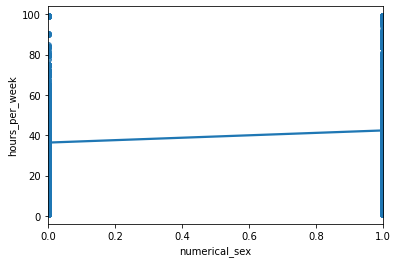

In [ ]:
sns.regplot(x='numerical_sex', y='hours_per_week', data=income94)

In [ ]:
#(b)
fit2 = ols('hours_per_week ~ C(numerical_sex) + education_num', data=income94).fit() 
print(fit2.summary())
#Residual Sum Square
print("\nThe Residual Sum Square is {}".format(fit2.ssr))

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1295.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:41:21   Log-Likelihood:            -1.2680e+05
No. Observations:               32561   AIC:                         2.536e+05
Df Residuals:                   32558   BIC:                         2.536e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                29.41

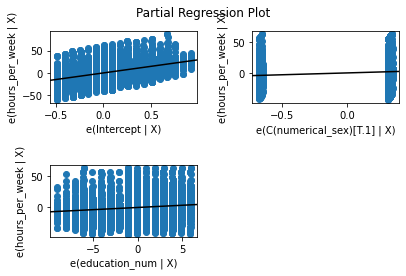

In [ ]:
fig = sm.graphics.plot_partregress_grid(fit2)
fig.tight_layout(pad=2.0)

In [ ]:
#(c)
income94['numerical_gross_income_group']=income94.gross_income_group.map({' <=50K':0,' >50K':1})
fit3 = ols('hours_per_week ~ C(numerical_sex) + education_num + C(numerical_gross_income_group)', data=income94).fit() 
print(fit3.summary())
#Residual Sum Squar
print("\nThe Residual Sum Square is {}".format(fit3.ssr))

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1130.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:41:40   Log-Likelihood:            -1.2643e+05
No. Observations:               32561   AIC:                         2.529e+05
Df Residuals:                   32557   BIC:                         2.529e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


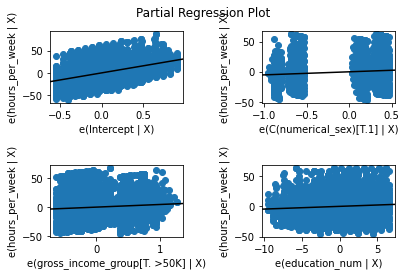

In [ ]:
fig = sm.graphics.plot_partregress_grid(fit3)
fig.tight_layout(pad=2.0)